# Predicting Penguin Species in the Palmer Archipelago


## 1. Introduction
Background Information: The Antarctic region, which is characterized by its extreme climate, is a critical habitat for penguins. The dataset that is used in this project is collected in the Palmer Archipelago, which is situated off the western coast of the Antarctic Peninsula, and hosts three species of penguin. 

Research Question: The research question this project is going to answer is how to predict the species of penguin based on their physical measurements. To answer the research question, we utilize a comprehensive dataset containing information on the three penguin species which are Chinstrap, Adélie, and Gentoo.

Description of the Dataset: This dataset, carefully collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network, provides valuable insights into the ecological and morphological characteristics of penguin populations (Gorman 2014).

| Varible | Unit | Description |
| --- | --- | --- |
| culmen_length | Millimeters (mm) | The length of the upper ridge of its beak.|
| culmen_depth | Millimeters (mm) | The depth of the upper ridge of its beak.  |
| flipper_length | Millimeters (mm) | The length of the its flippers.  |
| body_mass | Grams (g) | The weight of the penguin's body.  |
| species | | The class that we will be trying to predict. |



## 2. Methods

The dataset we are working on will need to be downloaded from a URL. We will need to "tidy" the data as it is not suited for work in it's current state. Only physical measurements will be considered from our dataset.  We will then split the dataset into 70%  training and 30% testing. This split is integral as we need to assess our model on unseen data. 

### Preliminary Data Processing
The preliminary data processing includes:
1. Downloading the dataset from the web.
2. Tidying the raw data into a tidy format.
3. Splitting the data  and producing summary statistics for the training data.

### 0. Environment setup

In [1]:
#install these libraries 
install.packages("kknn")
install.packages('GGally')
library(tidyverse) 
library(dplyr)
library(tidymodels)
library(kknn)
options(repr.matrix.max.rows = 6)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.4     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::di

### 1. Downloading the dataset from the web.

In [2]:
#download and read data
download.file("https://raw.githubusercontent.com/matthewsans/DCSI-100-group-project/main/penguins_lter.csv", "penguins")
penguin_data <- read_csv("penguins")
penguin_data


Rows: 344 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): studyName, Species, Region, Island, Stage, Individual ID, Clutch C...
dbl  (7): Sample Number, Culmen Length (mm), Culmen Depth (mm), Flipper Leng...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181,3750,MALE,NA,NA,Not enough blood for isotopes.
PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186,3800,FEMALE,8.94956,-24.69454,NA
PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195,3250,FEMALE,8.36821,-25.33302,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222,5750,MALE,8.30166,-26.04117,NA
PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212,5200,FEMALE,8.24246,-26.11969,NA
PAL0910,124,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A2,Yes,11/22/09,49.9,16.1,213,5400,MALE,8.36390,-26.15531,NA


### 2. Tidying the raw data into a tidy format.

The raw data has a number irrelevant columns, and we will only include columns that have recorded physical measurements which include the following; Culmen Length (mm), Culmen Depth (mm), Flipper Length (mm), and Body Mass (g). Finally will include the Species column, and change its data type to be a factor as its the class we are trying to predict. The columns also need to be standardized so we will remove spaces and only use lower-case characters. 

In [3]:
#Wrangle and clean data
names(penguin_data)[13] <- "body_mass"
names(penguin_data)[2] <- "sample_number"
names(penguin_data)[3] <- "species"
names(penguin_data)[10] <- "culmen_length"
names(penguin_data)[11] <- "culmen_depth"
names(penguin_data)[12] <- "flipper_length"
names(penguin_data)[13] <- "body_mass"
names(penguin_data)[5] <- "island"

penguin_data <- penguin_data %>%
  mutate(species = fct_recode(species,
                              "Adelie" = "Adelie Penguin (Pygoscelis adeliae)",
                              "Chinstrap" = "Chinstrap penguin (Pygoscelis antarctica)",
                              "Gentoo" = "Gentoo penguin (Pygoscelis papua)"))
na_penguin <- select(penguin_data, c(species, culmen_length, culmen_depth, flipper_length, body_mass)) |> 
    mutate(species = as.factor(species))
clean_penguin <- select(penguin_data, c(species, culmen_length, culmen_depth, flipper_length, body_mass)) |> 
    mutate(species = as.factor(species)) |>
    drop_na()
#Split data for exploring and training
set.seed(9876)
split_penguin <- initial_split(clean_penguin, prop = 0.70, strata = species)
penguin_training <- training(split_penguin)  # USE FOR DATA VISUALATION/TRAINING
penguin_testing <- testing(split_penguin)    # DO NOT USE UNTIL FINAL TEST

Figure !!!

In [4]:
#exploratory data analysis
penguin_na <- na_penguin |>
    group_by(species) |>
    rowwise() |>
    mutate(na_count = sum(is.na(c_across(everything())))) |>
    group_by(species) |>
    summarise(na_count = sum(na_count)) |>
    select(na_count)
penguin_mean <- penguin_training |>
      group_by(species) |>
      summarize(across(culmen_length:body_mass, \(x) mean(x, na.rm = TRUE)))
colnames(penguin_mean)[2:5] <- c("mean_culmen_length", "mean_culmen_depth", "mean_flipper_length", "mean_body_mass")
penguin_table <- bind_cols(penguin_mean, penguin_na)
penguin_table



species,mean_culmen_length,mean_culmen_depth,mean_flipper_length,mean_body_mass,na_count
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Adelie,38.82571,18.39524,189.9333,3702.857,4
Chinstrap,48.95319,18.31702,194.8085,3724.468,0
Gentoo,47.89186,15.06744,217.5814,5091.279,4


Figure !!!

Warning message in geom_histogram(bindwidth = 10):
“Ignoring unknown parameters: `bindwidth`”


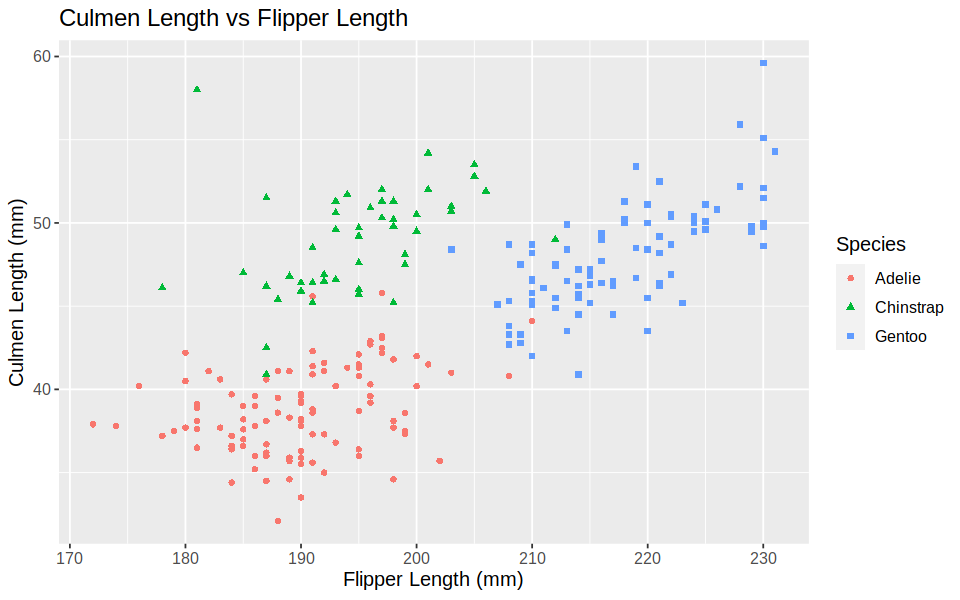

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


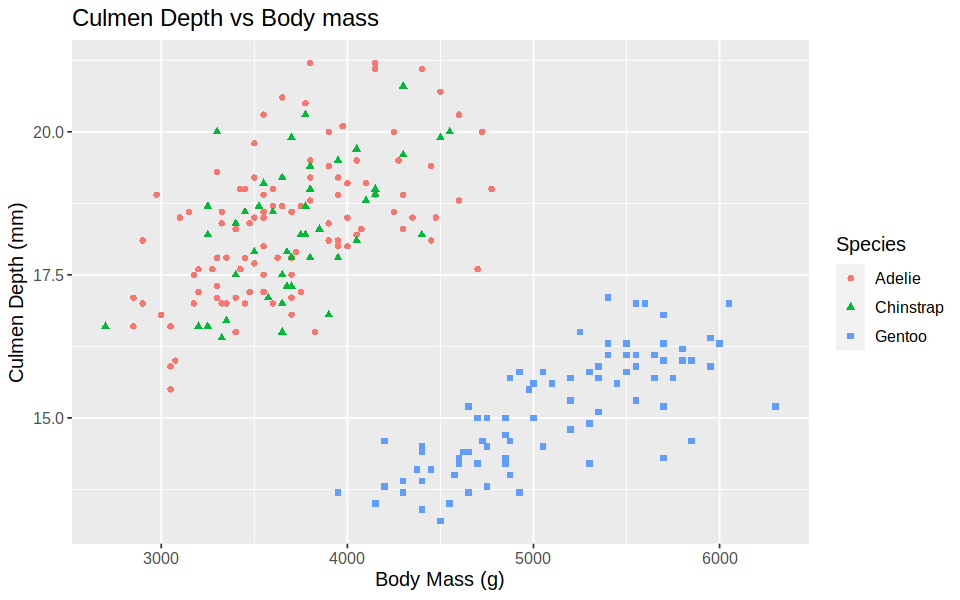

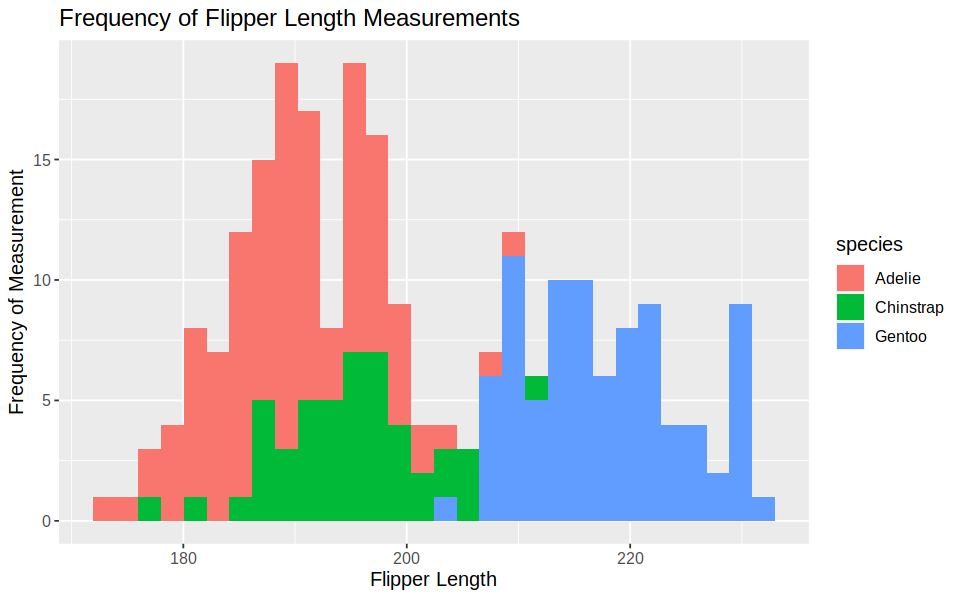

In [5]:
#Visualization

options(repr.plot.width = 8, repr.plot.height = 5)
penguin_visual1 <- ggplot(penguin_training, aes(y = culmen_length, x = flipper_length, color = species, shape = species)) +
    geom_point() + 
    labs(y = "Culmen Length (mm)", x = "Flipper Length (mm)", color = "Species", shape = "Species") +
    ggtitle("Culmen Length vs Flipper Length") +
    theme(text = element_text(size = 12)) 
penguin_visual2 <- ggplot(penguin_training, aes(y = culmen_depth, x = body_mass, color = species, shape = species)) +
    geom_point() + 
    labs(y = "Culmen Depth (mm)", x = "Body Mass (g)", color = "Species", shape = "Species") +
    ggtitle("Culmen Depth vs Body mass") +
    theme(text = element_text(size = 12)) 
penguin_visual3 <- ggplot(penguin_training, aes(x = flipper_length, fill = species)) +
    geom_histogram(bindwidth = 10) +
    labs(y = "Frequency of Measurement", x = "Flipper Length", title = "Frequency of Flipper Length Measurements") +
    theme(text = element_text(size = 12)) 



penguin_visual1
penguin_visual2
penguin_visual3

In order to perform k-nearest neighbors analysis, the model needs to be tuned with cross-validation. This means a good k-value needs to carefully picked by trying different k-values on the training dataset, and finding the best performing one

 splits.Length  splits.Class  splits.Mode      id           
 4            vfold_split  list           Length:5          
 4            vfold_split  list           Class :character  
 4            vfold_split  list           Mode  :character  
 4            vfold_split  list                             
 4            vfold_split  list                             

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.9873227,5,0.008488909,Preprocessor1_Model01
1,roc_auc,hand_till,0.9865079,5,0.010765603,Preprocessor1_Model01
6,accuracy,multiclass,0.9832447,5,0.012155739,Preprocessor1_Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
91,roc_auc,hand_till,0.9926797,5,0.004040970,Preprocessor1_Model19
96,accuracy,multiclass,0.8195560,5,0.006791757,Preprocessor1_Model20
96,roc_auc,hand_till,0.9925034,5,0.004099232,Preprocessor1_Model20


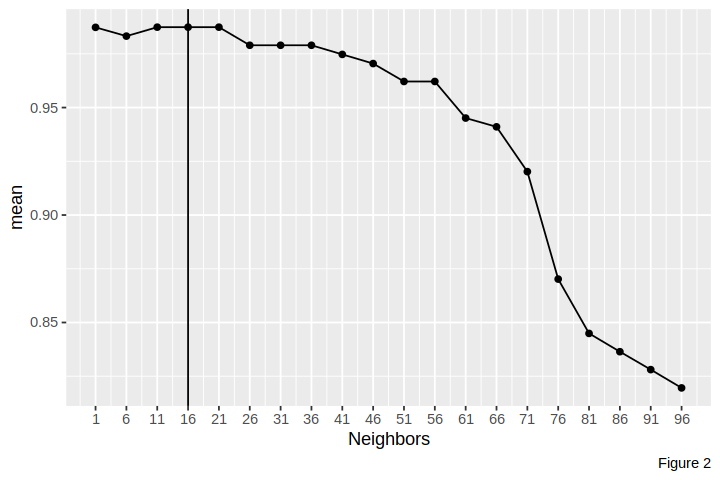

In [6]:
# we need to make a model
#kkn_spec <- knn(
set.seed(9876)


new_penguin_plot <- ggplot(penguin_training, aes(x = island, colour = species)) +
                           geom_bar()
k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

penguin_vfold <- vfold_cv(penguin_training, v = 5, strata = species)

penguin_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

penguin_recipe <- recipe(species ~ ., data = penguin_training) |>
    step_center(all_predictors()) |>
    step_scale(all_predictors())
#Cross-validation
penguin_fit <- workflow() |>
    add_recipe(penguin_recipe) |>
    add_model(penguin_spec) |>
    tune_grid(resamples = penguin_vfold, grid = k_vals ) |>
    collect_metrics()

options(repr.plot.width = 6, repr.plot.height = 4)
nn_plot <- penguin_fit |>
    filter(.metric == "accuracy") |>
    ggplot(aes(x = neighbors, y = mean)) +
           geom_line() +
           geom_point() + 
           geom_vline(xintercept = 16) +
           scale_x_continuous(breaks = seq(1, 100, by = 5)) +
           labs(x = "Neighbors", y = "mean", caption = "Figure 2")

summary(penguin_vfold)
penguin_fit
nn_plot
    


We can see there are multiple contenders for a k-value to pick. However, it looks like k = 16 would provide us with the most stable value as it doesn't vary between the points next to it. The first point has a high mean, but is most likely a product of overfitting. We can now train our model with a k-value of 16.

In [7]:

best_spec <- penguin_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 16) |>
  set_engine("kknn") |>
  set_mode("classification")

penguin_model <- workflow() |>
    add_recipe(penguin_recipe) |>
    add_model(best_spec) |>
    fit(data = penguin_training) 


penguin_pred <- predict(penguin_model, penguin_testing) |>
    bind_cols(penguin_testing)
confusion <- penguin_pred |>
             conf_mat(truth = species, estimate = .pred_class)
penguin_pred
confusion

.pred_class,species,culmen_length,culmen_depth,flipper_length,body_mass
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Adelie,Adelie,39.5,17.4,186,3800
Adelie,Adelie,40.3,18.0,195,3250
Adelie,Adelie,36.7,19.3,193,3450
⋮,⋮,⋮,⋮,⋮,⋮
Gentoo,Gentoo,50.5,15.2,216,5000
Gentoo,Gentoo,48.8,16.2,222,6000
Gentoo,Gentoo,45.2,14.8,212,5200


           Truth
Prediction  Adelie Chinstrap Gentoo
  Adelie        46         4      0
  Chinstrap      0        17      0
  Gentoo         0         0     37

Figure!!!

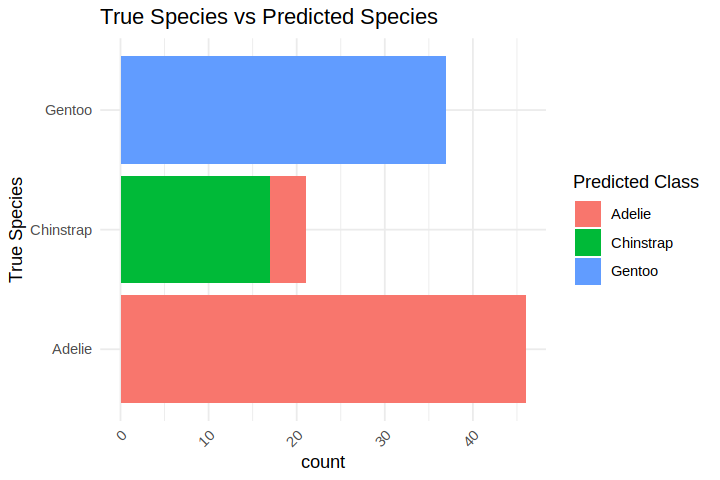

In [8]:


# # Plot a grouped bar plot
# ggplot(confusion_counts, aes(x = truth, y = Freq, fill = factor(Var2))) +
#   geom_bar(stat = "identity", position = "dodge") +
#   labs(title = "Confusion Matrix",
#        x = "True Class",
#        y = "Count",
#        fill = "Predicted Class") +
#   theme_minimal()


# Plot a grouped bar plot
visual_final <- ggplot(penguin_pred, aes(x = species, fill = .pred_class)) +
    geom_bar() +
    labs(title = "True Species vs Predicted Species",
       x = "True Species",
       fill = "Predicted Class") +
    theme_minimal() +
    coord_flip() +
    scale_x_discrete(labels = c("Adelie", "Chinstrap", "Gentoo")) +
    theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1))
visual_final

Methods:
The first step in our project is the Data Splitting. We will divide the penguin dataset into two subsets which are a training set and a testing set. We are planning to use a split ratio of 75:25. The second step is the variable selection, we will select the relevant features, culmen length, culmen depth, flipper length, and body mass for prediction. The third step is the KNN Model Building. We will specify a KNN model for classification and train the KNN model using our training set. Then we will use cross-validation to find the optimal value of k. The fourth step is the Model Evaluation. We will use the testing data to evaluate the KNN model’s performance. The following classification performance metrics will be calculated to measure the performance of our model, Accuracy (to measure the overall model accuracy in predicting penguin species), Confusion Matrix (to assess the number of true positives and negatives, as well as false positives and negatives), Precision and Recall. The final step is the Visualization. We will visualize our result using multivariate histogram charts. We will plot the different variables individually on histogram charts and color the bars to represent the count from each penguin species. Then, we will line the charts up in a grid so they are easier to read.

Expected outcomes and significance:
We expect to find that some penguin species typically have certain traits. For example, maybe one of the penguin species typically has the shortest culmen length. These findings could lend insight into the penguins evolution process. If we look at specific traits that have been developed over millions of years, we could perhaps get a better picture of what the world was like when they were evolving through the specific traits they developed. This could lead to future questions involving why certain penguin species developed differently than other penguin species and, in a similar vein, questions about where they will go from here.

Data citations:

Gorman, K. B., Williams, T. D., & Fraser, W. R. (2014). Ecological sexual dimorphism and environmental variability within a community of antarctic penguins (Genus      Pygoscelis). PloS One, 9(3), e90081–e90081. https://doi.org/10.1371/journal.pone.0090081
